<h1>Tabla de contenidos<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introducción" data-toc-modified-id="Introducción-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introducción</a></span></li><li><span><a href="#Datos-utilizados" data-toc-modified-id="Datos-utilizados-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Datos utilizados</a></span></li><li><span><a href="#Extración-de-datos-del-modelo" data-toc-modified-id="Extración-de-datos-del-modelo-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Extración de datos del modelo</a></span></li><li><span><a href="#Evolución-del-modelo-con-parámetro-C" data-toc-modified-id="Evolución-del-modelo-con-parámetro-C-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Evolución del modelo con parámetro C</a></span></li><li><span><a href="#Otro-ejemplo" data-toc-modified-id="Otro-ejemplo-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Otro ejemplo</a></span></li><li><span><a href="#Inicio-construcción-del-modelo" data-toc-modified-id="Inicio-construcción-del-modelo-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Inicio construcción del modelo</a></span></li><li><span><a href="#Implementación-del-modelo" data-toc-modified-id="Implementación-del-modelo-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Implementación del modelo</a></span></li><li><span><a href="#Medidas-de-fiabilidad" data-toc-modified-id="Medidas-de-fiabilidad-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Medidas de fiabilidad</a></span></li><li><span><a href="#Acuracidad" data-toc-modified-id="Acuracidad-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Acuracidad</a></span></li><li><span><a href="#Precisión-y-recall" data-toc-modified-id="Precisión-y-recall-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Precisión y recall</a></span></li><li><span><a href="#F1-score" data-toc-modified-id="F1-score-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>F1 score</a></span></li><li><span><a href="#Resumen-fiabilidad" data-toc-modified-id="Resumen-fiabilidad-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Resumen fiabilidad</a></span></li><li><span><a href="#Curva-de-Roc" data-toc-modified-id="Curva-de-Roc-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>Curva de Roc</a></span></li></ul></div>

# Introducción 

En un [post anterior](https://bigdatafran.github.io/big_data//RegresionLogit){:target="_blank}, ya se ha comentado la parte teórica sobre la que se construye este modelo, además se han mostrado algunos ejemplos realizados con R.

En este post me voy a centrar en el enfoque de este modelo que se da [desde scikit-learn](http://scikit-learn.org/stable/modules/linear_model.html#logistic-regression){:target="_blank"}.
 
Como puede observarse en la parte expositiva, el concepto puede parecer diferente al expuesto en este sitio web, pero el enfoque y resltado final es muy similar en ambos enfoques. En resumen se trata de minimizar también unas serie de funciones con un enfoque similar, lo único que en scikit-learn, además de utilizar la métrica L2, también emplea la métrica L1.

En scikit-learn el problema se enfoca desde un punto de vista de optimización, de tal manera que si se utiliza la métrica L2, se minimizará la siguiente función de coste:

\\[  \underset{w,c}{min}\frac{1}{2}W^{T}W+C\sum_{i=1}^{n}log(exp(-y_{i}(X_{i}^{T}W+c))+1) \\]

En el supuesto de que se quiera minimizar la función de coste utilizando la norma L1, el problema de optimización es el siguiente:

\\[ \underset{w,c}{min}\left\Vert W\right\Vert _{1}+C\sum_{i=1}^{n}log(exp(-y_{i}(X_{i}^{T}W+c))+1) \\]


Recordar del post anterior que en este tipo de modelos, las probabilidades de los valores que toma la variable independiente , se modelan de acuerdo a la función de tipo logístico, y en concreto que:

\\[ \frac{1}{1+e^{-z}} \\]

Los diferentes "solvers" implementados en scikit-learn para resolver los anteriores problemas de optimización son: "liblinear" ( es el que utiliza por defecto), "newton-cg", "lbfgs", "sag" y "saga". El modelo elegido se implementa dentro del parámetro *solver* de la funcion *LogisticRegression*.

A continuación comenzamos importando las librerías que se necesitan para este modelo.

In [14]:
import numpy as np
from sklearn import linear_model 
import matplotlib.pyplot as plt

# Datos utilizados

En primer lugar lo que hacemos es definir una función que va a servir, para delimitar las zonas de decisión que nos facilita el modelo. Antes de presentar la función, vamos a ver ciertas funciones de numpy que se utilizan en el ejemplo y conviene aclarar con carácter  previo.

In [15]:
#Primero un ejemplo de lo que hace np.c_
print(np.c_[np.array([1,2,3]), np.array([4,5,6])])
# A continuación veamos cómo trabaja la función ravel
x = np.array([[1, 2, 3], [4, 5, 6]])
print(np.ravel(x))
print("se obtiene el mismo resultado que antes")
print(x.reshape(-1))
print("Lo mismo pero en orden diferente")
print(np.ravel(x, order='F'))

[[1 4]
 [2 5]
 [3 6]]
[1 2 3 4 5 6]
se obtiene el mismo resultado que antes
[1 2 3 4 5 6]
Lo mismo pero en orden diferente
[1 4 2 5 3 6]


A continuación definimos la función que se va a utilizar.

In [16]:
def plot_classifier(classifier, X, y):
    # Se definen los rangos para dibujar la figura 
    x_min, x_max = min(X[:, 0]) - 1.0, max(X[:, 0]) + 1.0
    y_min, y_max = min(X[:, 1]) - 1.0, max(X[:, 1]) + 1.0

    # Se define el paso que se va a utilizar para definir la malla de datos
    step_size = 0.01

    # Ahora definimos la malla
    x_values, y_values = np.meshgrid(np.arange(x_min, x_max, step_size), np.arange(y_min, y_max, step_size))

    # se calcula la predición dada por el modelo sobre los puntos de la malla
    #Ver el apartado anterior para entender el funcionamiento de las funciones
    mesh_output = classifier.predict(np.c_[x_values.ravel(), y_values.ravel()])

    # redimensionamos los valores de mesh_output
    mesh_output = mesh_output.reshape(x_values.shape)

    # Dibujamos la figura
    plt.figure()
    
    # Elegimos un color para definir las zonas de predicción
    # Ver enlace: http://matplotlib.org/examples/color/colormaps_reference.html
    plt.pcolormesh(x_values, y_values, mesh_output, cmap=plt.cm.gray)

    # Overlay the training points on the plot 
    plt.scatter(X[:, 0], X[:, 1], c=y, s=80, edgecolors='black', linewidth=1, cmap=plt.cm.Paired)

    # especificamos los bordes del gráfico
    plt.xlim(x_values.min(), x_values.max())
    plt.ylim(y_values.min(), y_values.max())

    # indicamos lo ticks tanto del eje X como del eje Y 
    plt.xticks((np.arange(int(min(X[:, 0])-1), int(max(X[:, 0])+1), 1.0)))
    plt.yticks((np.arange(int(min(X[:, 1])-1), int(max(X[:, 1])+1), 1.0)))

    plt.show()

Como pequeña introducción a la creación de un modelo de estas acarcaterísticas, inicialmente se introducen unos pocos datos para entender el funcionamiento de cómo utilizar los comandos que facilita la [clase LogisticRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html){:target="_blank"}. 

Como vemos con las datos introducidos, se entiende que existen tres clases diferentes.

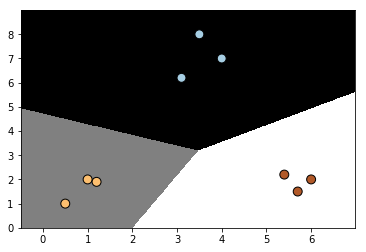

In [17]:
# Generamos los datos
X = np.array([[4, 7], [3.5, 8], [3.1, 6.2], [0.5, 1], [1, 2], [1.2, 1.9], [6, 2], [5.7, 1.5], [5.4, 2.2]])
y = np.array([0, 0, 0, 1, 1, 1, 2, 2, 2])

# Se inicializa el clasificador
classifier = linear_model.LogisticRegression(solver='liblinear', C=100)
#Para más opciones de los parámetros del modelo, ver la definición de la 
#clase en el enlace anterior

# Entrenamos el clasificador
classifier.fit(X, y)

# Ejecutamos la función definida anteriormente para dibujar las zonas de decisión
plot_classifier(classifier, X, y)

# Extración de datos del modelo

La función *classifier* admite muchos más parámetros que los utilizados en este ejemplo, su utilidad se puede ver en la página web que define el modelo. En este ejemplo se han utilizado:

1.- **solver**.- Para indicar el algoritmo utilizado para la resolución del problema de optimización.

2.- **C** .- que indica la inversa de la *"regularization strength"*. [Ver explicación de regularization aquí](https://en.wikipedia.org/wiki/Regularization_%28mathematics%29#Regularization_in_statistics_and_machine_learning){:_target="_blank"}. Al igual que ocurre con el método de *support vector machines*, valores más pequeños especifican una regularización más fuerte. En un post futuro, tengo la intención de desarrollar con mayor precisión este concepto. De momento ten presente que este parámetro va a servir para controlar tanto el sub ajuste como el sobre ajuste.

La función **decision_function**, nos va a facilitar las puntuaciones en cada punto de la muestra para cada una de las categorías de la variable independiente.

In [18]:
classifier.decision_function(X)

array([[  4.7571468 ,  -6.10180605, -11.58794507],
       [  7.21949016,  -5.74395713, -15.52888975],
       [  3.86180697,  -3.76504774, -11.6304974 ],
       [ -4.64423906,   4.86628767,  -3.91881734],
       [ -3.00846098,   3.20641548,  -5.40183274],
       [ -3.3786801 ,   2.86797242,  -4.63904887],
       [ -7.14128738,  -6.88219012,   6.8878137 ],
       [ -7.91784816,  -5.95136796,   7.50642493],
       [ -6.23553607,  -5.80175977,   4.87066012]])

In [19]:
# Obtenemos los parámetros con los que ha trabajado el modelo
classifier.densify()

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Obtenemos las predicciones de clasificación de cada uno de los puntos con los que se ha entrenado el modelo

In [20]:
Y_Predic=classifier.predict(X)
print(Y_Predic)

[0 0 0 1 1 1 2 2 2]


Si en lugar de obtener las predicciones, queremos conocer las probabilidades que el modelo ha asignado, lo haremos con el siguiente código.

In [21]:
classifier.predict_proba(X)

array([[9.97742742e-01, 2.24792260e-03, 9.33573773e-06],
       [9.96815802e-01, 3.18401770e-03, 1.79813200e-07],
       [9.77395569e-01, 2.25955586e-02, 8.87246208e-06],
       [9.32603904e-03, 9.71603642e-01, 1.90703191e-02],
       [4.64593281e-02, 9.49108477e-01, 4.43219534e-03],
       [3.33424487e-02, 9.56974605e-01, 9.68294649e-03],
       [7.90475947e-04, 1.02402738e-03, 9.98185497e-01],
       [3.63177191e-04, 2.58928294e-03, 9.97047540e-01],
       [1.95992874e-03, 3.02110724e-03, 9.95018964e-01]])

A continuación calculamos los parámetros estimados del modelo.

In [22]:
coef=classifier.coef_

In [23]:
inter=classifier.intercept_
print(inter)

[-6.28001714  6.52615987 -2.43580195]


Veamos cómo calcular las probabilidades obtenidas tres celdas más arriba. Lo único que hay que aplicar es que

\\[ p(i/X_1,X_2) =\frac{1}{1+e^{-(b_0+b_1*X_1+b_2*X_2)}}  \\]

siendo b0 los parámetros para cada una de las tres categorías obtenidos con la propiedad *_intercept* y b1 y b2 los parámetros almacenados en la variable *inter*.

Al ejecutar el siguiente script, vemos que los valores obtenidos para las probabilidades que nos da la instrucción *"classifier.predict_proba(X)"* coinciden con el resultado que a continuación se muestra.

In [24]:
import math
for i in range(0,X.shape[0]):
    for j in range(0,X.shape[1]+1):
        p=1/(1+math.exp(-(inter[j]+coef[j,0]*X[i,0]+coef[j,1]*X[i,1])))
        #print("%0.5f" % (p),end=", ")
        print("%10.3E" % (p),end=", ")
    print("\n")
        

 9.915E-01,  2.234E-03,  9.277E-06, 

 9.993E-01,  3.192E-03,  1.803E-07, 

 9.794E-01,  2.264E-02,  8.891E-06, 

 9.525E-03,  9.924E-01,  1.948E-02, 

 4.705E-02,  9.611E-01,  4.488E-03, 

 3.297E-02,  9.462E-01,  9.574E-03, 

 7.911E-04,  1.025E-03,  9.990E-01, 

 3.641E-04,  2.596E-03,  9.995E-01, 

 1.955E-03,  3.013E-03,  9.924E-01, 



En scikit-learn, muchas clases tienen el método denominado *score* que obtiene la precisión del modelo (recordar que precisión=(casos bien clasificados)/(n. total de casos)). En nuestro caso, podemos comprobar que hemos acertado en todos los casos, ya que el valor obtenido es 1

In [25]:
classifier.score(X,y)

1.0

Con la matriz de confusión, nos permite clasificar en una tabla de doble entrada, el número de casos que hay en cada cruce entre los valores observados y los valores predichos.

In [26]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y,Y_Predic)

array([[3, 0, 0],
       [0, 3, 0],
       [0, 0, 3]], dtype=int64)

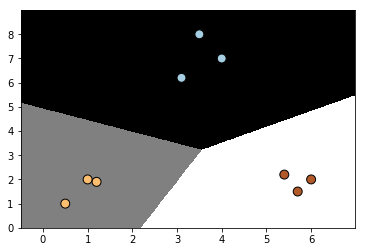

In [27]:
# initialize the logistic regression classifier
classifier = linear_model.LogisticRegression(solver='liblinear', C=1000)
# train the classifier
classifier.fit(X, y)

# draw datapoints and boundaries
plot_classifier(classifier, X, y)

# Evolución del modelo con parámetro C

A continuación se va a ver el efecto que sobre el modelo puede tener el valor del parámetro C. Para ello, lo que se va a obtener son una serie de regiones de predicción haciendo variar el parámetro C. Lo primero que se hace es definir la función *plot_classifier2* muy similar a la vista en un bloque anterior, pero ligeramente modificada, para obtener todas las representaciones gráficas dentro del mismo gráfico.

In [28]:
def plot_classifier2(figura,classifier, X, y,a=1,b=1,c=1,titulo=""):
    # Se definen los rangos para dibujar la figura 
    x_min, x_max = min(X[:, 0]) - 1.0, max(X[:, 0]) + 1.0
    y_min, y_max = min(X[:, 1]) - 1.0, max(X[:, 1]) + 1.0

    # Se define el paso que se va a utilizar para definir la malla de datos
    step_size = 0.01

      # Ahora definimos la malla
    x_values, y_values = np.meshgrid(np.arange(x_min, x_max, step_size), np.arange(y_min, y_max, step_size))

    # se calcula la predición dada por el modelo sobre los puntos de la malla
    mesh_output = classifier.predict(np.c_[x_values.ravel(), y_values.ravel()])

    # redimensionamos el array
    mesh_output = mesh_output.reshape(x_values.shape)
    
    ax=figura.add_subplot(a,b,c)
    ax.set_title(titulo)
    
    # Definimos los colores que queremos usar
    # here: http://matplotlib.org/examples/color/colormaps_reference.html
    ax.pcolormesh(x_values, y_values, mesh_output, cmap=plt.cm.gray)
    
    ax.scatter(X[:, 0], X[:, 1], c=y, s=80, edgecolors='black', 
               linewidth=1, cmap=plt.cm.Paired)


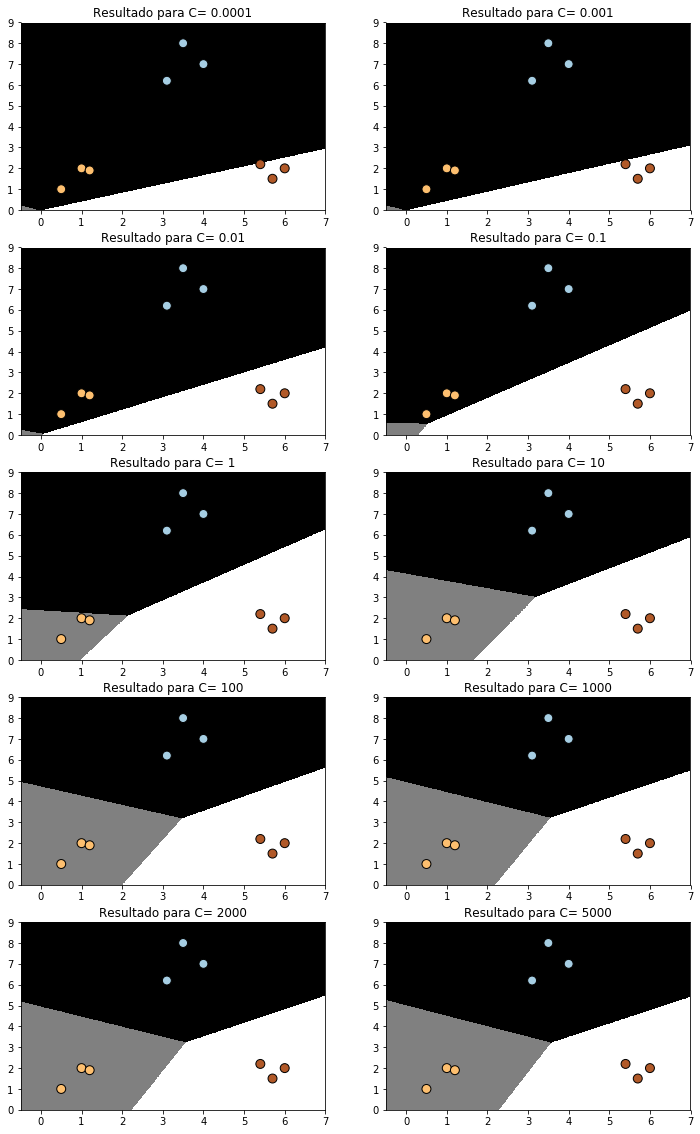

In [29]:
fig=plt.figure(figsize=(12,20))
C_param_range = [0.0001,0.001,0.01,0.1,1,10,100,1000,2000,5000]
J=1
for i in C_param_range:
    # initialize the logistic regression classifier
    classifier = linear_model.LogisticRegression(solver='liblinear', C=i)
    # train the classifier
    classifier.fit(X, y)

    # draw datapoints and boundaries
    title="Resultado para C= "+ str(i)
    plot_classifier2(fig,classifier, X, y,a=5,b=2,c=J,titulo=title)
    J =J+1
plt.show()    

Para entender los gráficos anteriores hay que aclarar que **al aumentar C se tienen una penalización más alta por un  error de clasificación**, y como puede verse se tiene una clasificación más óptima. Para valores bajos de C, los resultados son bastante malos, e incluso las zonas de decisión, prácticamente quedan delimitadas por una recta.

# Otro ejemplo

En los apartados anteriores se ha mostrado un ejemplo muy simple para que el lector se vaya familiarizando con esta metodoligía. En lo que sigue, vamos a utilizar este método con otro tipo de aplicación. En concreto, se utilizará para poder clasificar los correos en spam o no spam, dependiendo del contenido del mensaje que traiga el correo. El ejemplo que utilizaremos, serán los datos de la [página UCI que puedes ver en este enlace](https://archive.ics.uci.edu/ml/datasets/sms+spam+collection){:target="_blank"}. 

Como es un fichero de tipo zip, tenemos que descargarlo, descomprimirlo y posteriormente leerlo.Comenzamos por leer los datos con Pandas y obtener agunos estadísticos resumenes de los mismos.

In [30]:
import pandas as pd
datos= pd.read_csv('G:/MisCodigos/web/data/SMSSpamCollection.txt', delimiter='\t',header=None)
datos.head()

,0,1
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Como podemos observar el conjunto de datos está constituido por dos columnas. La primera indica si el correo es o no espam y la segunda columna, contiene el cuerpo del correo electrónico.

Veamos cómo están distribuidos los correos, enter ser o no der spam.

In [31]:
print ('Número de mensajes que son spam:', datos[datos[0] == 'spam'][0].count())
print ("Número de mensajes que son ham",datos[datos[0] == 'ham'][0].count())

Número de mensajes que son spam: 747
Número de mensajes que son ham 4825


In [32]:
#datos[datos[0]=='ham',0]
print(type(datos))

<class 'pandas.core.frame.DataFrame'>


# Inicio construcción del modelo

Comencemos importando las bibliotecas necesarias para construir el modelo que buscamos.

In [33]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.cross_validation import train_test_split, cross_val_score

D:\programas\Anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Por regla general al construir un modelo con machine, lo que debe hacerse es dividir el conjunto de datos en dos subconjuntos: Unos será el que sirva para entrenar el modelo, mientras que el otro conjunto servirá para chequear el modelo obtenido en el paso anterior. Scikip-learn tiene una herramienta muy fácil de utilizar para conseguir esto, veamos cómo con el siguiente código (observar que se pone *"random_state=20"* para obtener siempre el mismos resultado en la elección aleatoria que se produce).

In [34]:
X_train_raw, X_test_raw, y_train, y_test = train_test_split(datos[1],datos[0],
        random_state=20)

print(datos.shape)
print(X_train_raw.shape)
print(X_test_raw.shape)
X_test_raw.iloc[1]

(5572, 2)
(4179,)
(1393,)


'hi baby im sat on the bloody bus at the mo and i wont be home until about 7:30 wanna do somethin later? call me later ortxt back jess xx'

Codificamos la primera feature con cero si no es spam y uno si es spam

In [35]:
y_train[y_train=='ham']=0
y_train[y_train=='spam']=1
y_test[y_test=='ham']=0
y_test[y_test=='spam']=1
y_train=y_train.astype('int')
y_test=y_test.astype('int')

Hacemos una trasnformación de los datos de la siguiente manera:

In [36]:
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train_raw)
X_test = vectorizer.transform(X_test_raw)
print(X_train[0:1])
print(X_test[0:1])

  (0, 6996)	0.16556792560597175
  (0, 1324)	0.26429710567869324
  (0, 1133)	0.1996198979225791
  (0, 515)	0.3722864947919741
  (0, 6672)	0.14736275914770847
  (0, 5055)	0.1951816469442735
  (0, 3574)	0.28733559192349983
  (0, 1628)	0.17373886759530308
  (0, 1566)	0.11041199528377776
  (0, 115)	0.28733559192349983
  (0, 1770)	0.16310476115118047
  (0, 2586)	0.17968998495260385
  (0, 710)	0.28733559192349983
  (0, 5057)	0.2251215486221769
  (0, 7273)	0.25688036969281397
  (0, 4323)	0.18170499641768148
  (0, 516)	0.1922031619366998
  (0, 4795)	0.2508204551521012
  (0, 139)	0.25688036969281397
  (0, 3520)	0.34759690783680136
  (0, 2513)	0.937644063417614


# Implementación del modelo

Ahora ya estamos en disposición de implementar un modelo de regresión logit.

In [37]:
classifier = LogisticRegression()
# Entrenamos ahora el modelo
classifier.fit(X_train, y_train)
#Ahora obtenemos la predicción de los datos que se han dejado para contraste del modelo
predictions = classifier.predict(X_test)

for i, prediction in enumerate(predictions[:5]):
    print('Predicción: {} . mensage: {}'.format(prediction, X_test_raw.iloc[i]))
    
    

Predicción: 0 . mensage: K:)eng rocking in ashes:)
Predicción: 0 . mensage: hi baby im sat on the bloody bus at the mo and i wont be home until about 7:30 wanna do somethin later? call me later ortxt back jess xx
Predicción: 0 . mensage: We left already we at orchard now.
Predicción: 0 . mensage: I absolutely LOVE South Park! I only recently started watching the office.
Predicción: 0 . mensage: network operator. The service is free. For T & C's visit 80488.biz


# Medidas de fiabilidad

Una vez construido el modelo, siempre es necesario hacer alfunas pruebas con él a fin de ver su fiabilidad. Scikip-learn tiene muchas funciones para hacer este tipo de estudios. En el ejemplo que sigue se muestra cómo se puede construir una matriz de confusión, para ver los posibles errores que se puedan cometer.

In [38]:
from sklearn.metrics import confusion_matrix
matrizConfusion=confusion_matrix(y_test,predictions)
print(matrizConfusion)

[[1191    4]
 [  45  153]]


A continuación hacemos una representación gráfica de los datos contenidos en la matriz de confusión.

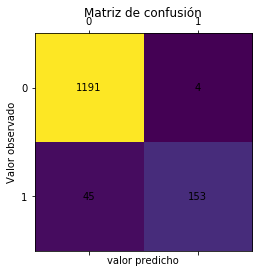

In [39]:
import matplotlib.pyplot as pl

fig, ax = plt.subplots()
ax.matshow(matrizConfusion)
plt.title('Matriz de confusión')
for (i, j), z in np.ndenumerate(matrizConfusion):
    ax.text(j, i, '{:0.0f}'.format(z), ha='center', va='center')

plt.ylabel('Valor observado')
plt.xlabel('valor predicho')
plt.show()

# Acuracidad

Esta medida nos da el porcentaje de aciertos del modelo, y por lo tanto su valor se calculará como la suma de los elementos de la diagonal, dividido entre la suma total.

In [40]:
from sklearn.metrics import accuracy_score
print('Acuracidad: {}'.format(accuracy_score(y_test,predictions)))
# Calculado de forma manual, sería de la siguiente forma
acu=((matrizConfusion[0,0]+matrizConfusion[1,1])/matrizConfusion.sum())
print(acu)

Acuracidad: 0.964824120603015
0.964824120603015


Existe otro procedimiento para medir la fiabilidad del modelo, a grandes rasgos consiste en los siguiente. Se divide la muestra en una serie de grupos (K-fold's), en el ejemplo que sigue, esto se ha indicado con el parámetro *"cv=5"*, con lo que se indique que se haga una división en 5 grupos. Unos de estos grupos servirá para chequear el modelo y los otros cuatro para su entrenamiento. Con esta distribución de la muestra, se obtiene un valor de la acuracidad.

En cada paso se van intercambiando los grupos que tienen datos de tipo test y por consiguiente de tipo train. En este caso concreto en total tenderemos 5 pasos pues cv=5. Los resultados obtenidos se muestran en el siguiente script.

In [41]:
from sklearn.cross_validation import  cross_val_score
scores = cross_val_score(classifier, X_train, y_train, cv=5)
print (np.mean(scores))

print(scores)

0.956447583302295
[0.9569378  0.96052632 0.96052632 0.95334928 0.9508982 ]


# Precisión y recall

Si bien la acuracidad es un valor muy importante, pues está midiendo la tasa de aciertos del modelo, no es menos importante saber qué estrutura tiene los casos en los que el modelo se equivoca. Para explicar lo que sigue, vamos a definir antes los siguientes conceptos:

1.- Verdaderos Positivos (VP). Número de casos en los que el modelo predice positivo, y el dato real es positivo.

2.- Verdaderos Negativos (VN). Número de casos en los que el modelo predice negativo, y el dato real es negativo.

3.- Falsos Positivos (FP). Número de casos en los que el modelo predice un valor positivos, pero el valor real es negativo. 

4.- Falsos Negativos (FN). Número de casos en los que el modelo predice un valor negativo, pero el valor real es positivo.

Interesa mucho también evaluar los casos 3 y 4, pues si el modelo está prediciendo la aparición o no de cáncer, con el error 3 estaríamos pronosticando que hay cáncer cuando no lo hay, mientra que el error 4 sería más grave aún, pues estamos pronosticando que una persona no tienen cáncer, cuando realmente lo tiene, y esto puede ser sumamente grave, pues el retraso de la aplicación de la medicación pertinente puede acarrear nefastas consecuencias para el paciente.

Para estudiar este tipo de casos, se definen los siguiente indicadores: Precisión y Recall,

Precisión se define de la siguiente manera:

\\[ P=\frac{VP}{VP+FP} \\]

Mientras que Recall, se define así

\\[ R=\frac{VP}{VP+FN} \\]

De lo que se trata con estas dos fórmulas es relativizar los verdaderos positivos y compararlo con las ocasiones en las que el predictor se equivoca.

Veamos cómo se pueden obtener estos valores mediante la utilización de scikit-learn.

In [42]:
precisions = cross_val_score(classifier, X_train, y_train, cv=5, scoring='precision')
print ('Precision', np.mean(precisions), precisions)
recalls = cross_val_score(classifier, X_train, y_train, cv=5, scoring='recall')
print ('Recalls', np.mean(recalls), recalls)

Precision 0.989690423420296 [0.98684211 1.         0.97530864 0.98630137 1.        ]
Recalls 0.6756797331109258 [0.68181818 0.7        0.71818182 0.65454545 0.62385321]


Podemos ver que el valor de Recall es ligeramente bajo y ello es debido a que se detectan bastantes falsos negativos, por lo tanto habrá que tener cuidado en este aspecto, cuando se utilice este modelo para la predicción. En nuestro ejemplo concreto se puede detectar un número algo alto de correos que el modelo predice son Spam, cuando realmente no lo es, en concreto se estarían clasificando aproximadamente el 22 por ciento de correo spam como no spam.

# F1 score

Es otro indicador muy utilizado dentro del mundo de la clasificación, y en términos matemáticos, no es otra cosa más que la media armónica entre la precisión y el recall, y se calcula utilizando la siguiente fórmula:

\\[ F1= (\frac{P^{-1}+R^{-1}}{2})^{-1}  =2 \frac{P*R}{P+R} \\]


La medida de F1 penaliza a los clasificadores con una precisión y Recall desequilibrado. Veamos, cómo medir esto con scikit learn


In [43]:
f1s = cross_val_score(classifier, X_train, y_train, cv=5, 
scoring='f1')
print ('F1: ', np.mean(f1s), f1s)


F1:  0.8024905966761053 [0.80645161 0.82352941 0.82722513 0.78688525 0.76836158]


# Resumen fiabilidad

En scikit learn existe la función *"classification_report"* que nos facilita estos tipos de valores con ejecutarla sólo una vez. Veamos cómo se haría en nuestro ejemplo:

In [44]:
from sklearn.metrics import classification_report
targets = ['No spam', 'spam']
classification_report(y_test,predictions,target_names=targets)


'             precision    recall  f1-score   support\n\n    No spam       0.96      1.00      0.98      1195\n       spam       0.97      0.77      0.86       198\n\navg / total       0.97      0.96      0.96      1393\n'

# Curva de Roc

En un [post anterior](https://bigdatafran.github.io/big_data//LogitClasificacion), se ha presentado la curva de ROC y la forma de obtenerla mediante R, aquí vamos a ver cómo se consigue este resultado con scikit-learn.

A diferencia de la acuracidad, la curva de ROC no depende de si los datos de cada una de las clases están o no balanceados.

Recordemos, que el área de la curva de ROC es un indicador de la fiabilidad o bondad del modelo, de tal manera que cuanto mayor sea el valor del área de la curva de ROC, mejores predicciones tendremos.

La curva de ROC en scikit-learn se calcula de la siguiente manera:

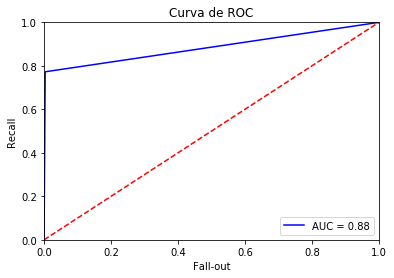

In [45]:
from sklearn.metrics import roc_curve, auc

false_positive_rate, recall, thresholds = roc_curve(y_test,predictions)
roc_auc = auc(false_positive_rate, recall)
plt.title('Curva de ROC')
plt.plot(false_positive_rate, recall, 'b', label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out')
plt.show()